In [42]:
import datacube_stats
from skimage import exposure
from matplotlib import pyplot as plt
import numpy as np

In [43]:
import yaml
from datacube_stats import StatsApp
from datacube import Datacube

config_yaml = """
sources:
  - product: ls8_usgs_sr_scene
    measurements: [red, nir]
    masks:
      - product: ls8_usgs_sr_scene
        measurement: pixel_qa
        flags:
          cloud_shadow: no_cloud_shadow
          cloud: no_cloud
  - product: ls7_usgs_sr_scene
    measurements: [red, nir]
    masks:
      - product: ls7_usgs_sr_scene
        measurement: pixel_qa
        flags:
          cloud_shadow: no_cloud_shadow
          cloud: no_cloud
date_ranges:
    start_date: 2015-01-01
    end_date: 2016-01-01
storage:
    # this driver enables in-memory computation
    driver: xarray
    crs: EPSG:32616
    tile_size:
        x: 40000.0
        y: 40000.0
    resolution:
        x: 30
        y: -30
    chunking:
        x: 200
        y: 200
        time: 1
    dimension_order: [time, y, x]
computation:
    chunking:
        x: 800
        y: 800
input_region:
    x: [-105.4834, -105.3600]
    y: [21.5759, 21.7016]


output_products:
    - name: sr_ndvi
      statistic: simple_normalised_difference
      statistic_args: 
        name: sr_ndvi
        band1: nir
        band2: red
        stats: 
          - min
          - mean
          - max
"""

# or manually creating a config dictionary works too
config = yaml.load(config_yaml)

dc = Datacube()
app = StatsApp(config, dc.index)

print('generating tasks')
tasks = app.generate_tasks()

print('running tasks')
for task in tasks:
    # this method is only available for the xarray output driver
    output = app.execute_task(task)

print('processing complete')

generating tasks
running tasks
processing complete


In [47]:
ndvi_max = output.result['sr_ndvi'].sr_ndvi_max.isel(time=0)
ndvi_mean = output.result['sr_ndvi'].sr_ndvi_mean.isel(time=0)
ndvi_min = output.result['sr_ndvi'].sr_ndvi_min.isel(time=0)

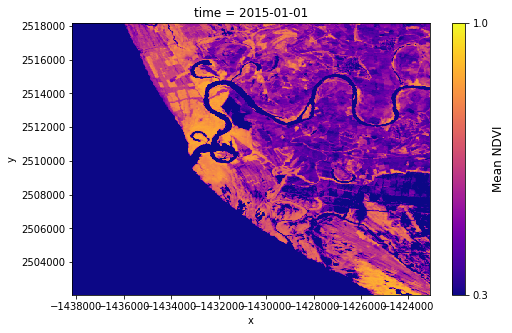

In [50]:
#Set up colour ramp details
ndvi_bounds = [-1, 0.3, 1]
#Create max_ndvi image with specified colour ramp details
fig = plt.figure(figsize =(10,5)) 
i=ndvi_mean.plot.imshow(cmap = 'plasma',vmin = 0.3, vmax = 1)
plt.colorbar(i, ticks=ndvi_bounds, 
            ).set_label(label='Mean NDVI',
             size=12) #Add definable colour bar
fig.delaxes(fig.axes[1]) #Remove pre-defined colour bar

plt.show() #Create image

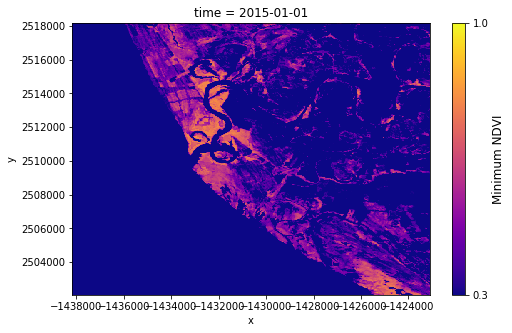

In [49]:
fig = plt.figure(figsize =(10,5)) 
i=ndvi_min.plot.imshow(cmap = 'plasma',vmin = 0.3, vmax = 1)
plt.colorbar(i, ticks=ndvi_bounds, 
            ).set_label(label='Minimum NDVI',
             size=12) #Add definable colour bar
fig.delaxes(fig.axes[1]) #Remove pre-defined colour bar

plt.show() #Create image

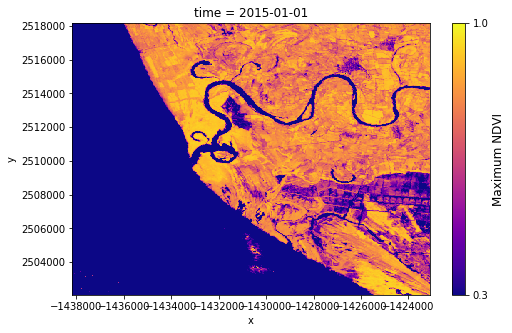

In [51]:
fig = plt.figure(figsize =(10,5)) 
i=ndvi_max.plot.imshow(cmap = 'plasma',vmin = 0.3, vmax = 1)
plt.colorbar(i, ticks=ndvi_bounds, 
            ).set_label(label='Maximum NDVI',
             size=12) #Add definable colour bar
fig.delaxes(fig.axes[1]) #Remove pre-defined colour bar

plt.show() #Create image